1)Outcome variable Y: the dependent variable we aim to predict or explain.
Predictor variable X: the independent variable used to predict Y
Intercept β0: the expected value of Y when X=0
Slope β1: the change in Y for a one-unit increase in X.
Error term ϵ: captures the variability in Y that isn't explained by X, typically assumed to be normally distributed with mean 0 and some standard deviation σ.

Yi=β0+β1Xi+ϵi

where each Yi is an outcome based on its associated predictor Xi, the intercept β0, the slope β1, and a random error term ϵi∼N(0,σ2) This form implies that given fixed values of X, the distribution of Y is normally distributed around the linear component β0+β1 X with variance σ2 .

In [6]:
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

# Parameters
n = 100  # Number of data points
beta0 = 2  # Intercept
beta1 = 3  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor values
np.random.seed(0)  # For reproducibility
x = np.random.uniform(-10, 10, n)

# Generate errors and outcome values
epsilon = norm.rvs(0, sigma, n)  # Error term
y = beta0 + beta1 * x + epsilon  # Linear model with noise

# Plot the results
fig = go.Figure()

# Plot the line without noise (true line)
y_true = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=y_true, mode='lines', name='True line (Y = beta0 + beta1 * X)', line=dict(color='blue')))

# Plot the simulated data points
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Simulated Data Points', marker=dict(color='red', size=6)))

# Customize plot
fig.update_layout(title='Simple Linear Regression Model - Simulated Data',
                  xaxis_title='Predictor (X)',
                  yaxis_title='Outcome (Y)',
                  showlegend=True)

fig.show()


2)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # for specifying and fitting statistical models
import plotly.express as px  # for data visualization

# Simulate data based on a Simple Linear Regression model
n = 100
beta0 = 2
beta1 = 3
sigma = 1

np.random.seed(0)
x = np.random.uniform(-10, 10, n)
epsilon = np.random.normal(0, sigma, n)
y = beta0 + beta1 * x + epsilon

# Create a DataFrame
df = pd.DataFrame({'x': x, 'Y': y})


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.949e+04
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.48e-123
Time:                        22:35:36   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1906      0.101     21.672      0.0

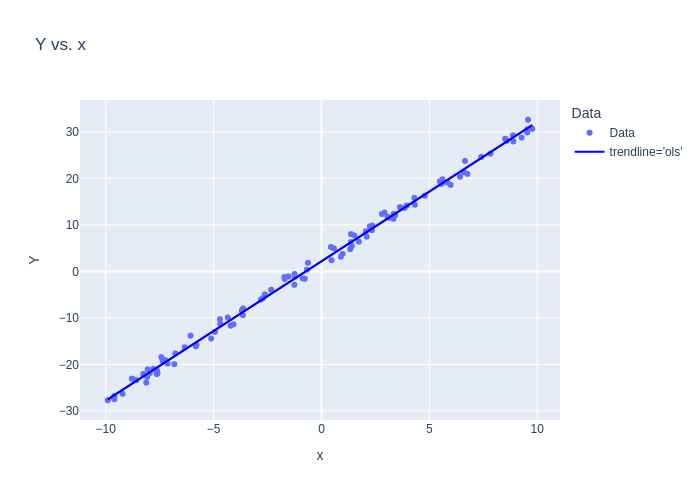

In [3]:
# Fit a simple linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Print model summaries
print(fitted_model.summary())
print(fitted_model.summary().tables[1])
print(fitted_model.params)
print(fitted_model.params.values)
print(fitted_model.rsquared)

# Visualization
df['Data'] = 'Data'  # to add legend for data points
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the OLS trendline manually as an overlay
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")


3)

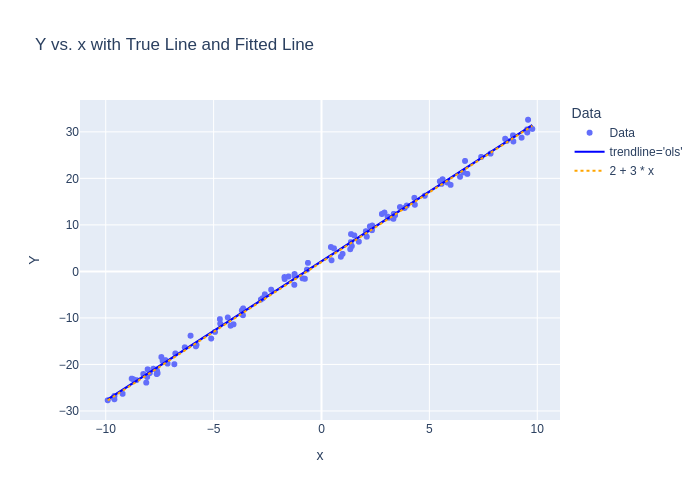

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters
n = 100
beta0 = 2  # True intercept
beta1 = 3  # True slope
sigma = 1  # Standard deviation of errors

# Data simulation
np.random.seed(0)
x = np.random.uniform(-10, 10, n)
epsilon = np.random.normal(0, sigma, n)
y = beta0 + beta1 * x + epsilon
df = pd.DataFrame({'x': x, 'Y': y})

# Fit the OLS model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Plot the simulated data and fitted line
df['Data'] = 'Data'  # Add for legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with True Line and Fitted Line')

# Add the OLS fitted line manually for flexibility
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Add the theoretical line from the true model
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x',
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")


4)The fitted_model.fittedvalues are calculated by plugging each xi from the dataset into the estimated regression equation, using the values of β^0 and β^1 obtained from fitted_model.params. Specifically, this is done for each observation i as follows:

y^i=fitted_model.params[0]+fitted_model.params[1] × xi

5)In the Ordinary Least Squares (OLS) method, the fitted line is chosen to minimize the sum of the squared residuals. Residuals (ei) are the differences between observed values (Yi) and the values predicted by the fitted model (y^i). In other words, each residual ei=Yi−y^i measures how far off the prediction is for a given data point.

Emphasizing Large Errors: Squaring each residual gives more weight to larger errors, making the model prioritize minimizing larger discrepancies, which helps improve the fit.
Eliminating Negative Signs: Squaring residuals avoids cancellations from positive and negative residuals, allowing us to measure the overall "distance" of all residuals from zero.

6)R-squared is defined as 1−Residual Variation/Total Variation, which gives the proportion of the total variation in Y that the model explains. When residual variation is low compared to total variation, R-squared approaches 1, indicating a good fit.

fitted_model.rsquared directly provides the R-squared value for the model, showing how much of the outcome's variation the model explains.The expression np.corrcoef(Y, fitted_model.fittedvalues)[0,1]^2 also yields R-squared because the square of the correlation between Y and y^yreflects how closely they align in a linear relationship.
Similarly, np.corrcoef(Y, x)[0,1]^2 represents the square of the correlation between Y and x, which captures how much of Y's variation can be explained by a simple linear relationship with x alone (without considering model residuals).

7)Linearity of the Relationship:
Simple Linear Regression assumes a linear relationship between the predictor x (Amount of Fertilizer) and the outcome Y (Crop Yield). However, the plot of crop yield against fertilizer amount suggests a non-linear, likely exponential or quadratic trend rather than a linear one. At low levels of fertilizer, crop yield increases gradually, then accelerates with higher fertilizer levels, suggesting that a linear model may not be the best fit for this data.

Normality and Homoscedasticity of Residuals:
The residuals should ideally have constant variance (homoscedasticity) and follow a normal distribution around zero. In this case, examining the histogram of residuals likely reveals a skew or non-normal pattern, as well as potentially increasing residual variance with higher fertilizer levels (heteroscedasticity). These issues imply that the model errors do not meet the assumptions required for accurate inferences in a simple linear model.

8)A scatter plot is created using Plotly to visualize the relationship between waiting and duration, with:

OLS (Ordinary Least Squares) Linear Regression trendline: This trendline helps us see the overall linear association between the two variables.
LOWESS (Locally Weighted Scatterplot Smoothing) trendline: A smooth, non-linear trendline is added using statsmodels' LOWESS method for visualizing any potential non-linear pattern in the data.

Reject H0: If the p-value is low (e.g., p≤0.05), there is sufficient evidence to suggest a significant association between waiting and duration, supporting that the waiting time has a linear effect on eruption duration.
Fail to Reject H0	: If the p-value is high (e.g., p>0.1), we lack evidence to reject the null hypothesis, suggesting no statistically significant linear association.


9)Define the Short Wait Times Subset:
Filter the dataset to include only observations where the waiting time is less than the short_wait_limit values.
This subset is examined for short wait times of 62, 64, and 66 minutes.

Fit the Linear Regression Model on the Subset:
For each short_wait_limit, we fit a linear regression model with the formula duration ~ waiting using the subset of data below the specified wait time.
The output from fit().summary().tables[1] provides the coefficient for waiting and its p-value to evaluate evidence against the null hypothesis.

Null Hypothesis for Short Wait Times
The null hypothesis (H0) states that there is no linear association between waiting time and eruption duration within the range of short wait times. Formally:
H0:β1=0
where β1 is the slope parameter in the linear model for this restricted dataset.

Scatter Plot Visualization:
A scatter plot is generated with a regression trendline to visually inspect the relationship between waiting time and duration within each specified range.

10)

In [7]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from scipy import stats

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define long wait time threshold and subset
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Observed slope coefficient
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params[1]

# Bootstrap sampling distribution
for _ in range(1000):  # Adjust the number for greater accuracy if needed
    sample = long_wait_data.sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrapped_slope_coefficients.append(model.params[1])

# Simulate data under the null hypothesis of no association
for _ in range(1000):
    # Create a copy and simulate 'duration' under null hypothesis (no association)
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + \
                                          stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params[1])

# Convert to numpy arrays for easy quantile and p-value calculation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Calculate 95% bootstrapped confidence interval for slope
bootstrap_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Calculate p-value from simulated distribution
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Plotting the bootstrapped slope coefficients distribution
fig = px.histogram(bootstrapped_slope_coefficients, nbins=50, 
                   title="Bootstrapped Sampling Distribution of Slope Coefficients",
                   labels={'value': 'Slope Coefficient'})
fig.add_vline(x=bootstrap_ci[0], line_dash="dash", line_color="red", annotation_text="2.5% CI")
fig.add_vline(x=bootstrap_ci[1], line_dash="dash", line_color="red", annotation_text="97.5% CI")
fig.add_vline(x=observed_slope, line_dash="dash", line_color="blue", annotation_text="Observed Slope")
fig.show()

# Plotting the simulated slope coefficients under null hypothesis
fig = px.histogram(simulated_slope_coefficients, nbins=50,
                   title="Simulated Slope Coefficients Under Null Hypothesis",
                   labels={'value': 'Slope Coefficient'})
fig.add_vline(x=observed_slope, line_dash="dash", line_color="blue", annotation_text="Observed Slope")
fig.show()

# Results
print(f"95% Bootstrapped Confidence Interval: {bootstrap_ci}")
print(f"Simulated p-value: {simulated_p_value}")


/tmp/ipykernel_149/2780778569.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AttributeError: 'numpy.ndarray' object has no attribute 'append'

11)The new model can be specified as:

Yi=βintercept+1["long"](ki)βcontrast+ϵi

Previous Linear Models:
Full dataset: smf.ols('duration ~ waiting', data=old_faithful) models eruption duration as a continuous function of waiting time for all wait times.
Short wait times: smf.ols('duration ~ waiting', data=old_faithful[short_wait]) models eruption duration as a function of waiting time only for “short” wait times (e.g., <64).
Long wait times: smf.ols('duration ~ waiting', data=old_faithful[long_wait]) models eruption duration as a function of waiting time only for “long” wait times (e.g., >71).

Current Indicator Variable Model:
The new model focuses on a categorical distinction between “short” (<68) and “long” (≥68) wait times instead of a continuous relationship.
This simplifies the interpretation by focusing on the mean difference in duration between the two categories.
It allows us to test directly whether there is a significant difference in average eruption duration between “short” and “long” wait times.

In [3]:
from IPython.display import display
import plotly.express as px
import statsmodels.formula.api as smf

# Fit the indicator variable model with "short" as the reference category
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display model summary (Table 1 for coefficient table)
display(model.summary().tables[1])

# Box plot to visualize the duration by kind
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Eruption Duration by Wait Time Category',
             category_orders={'kind': ['short', 'long']})
fig.show()


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


12)
Model 1: All Data Using Slope (duration ~ waiting)
This model treats waiting as a continuous predictor across all data.
If the histogram of the residuals for this model is approximately symmetric and follows the superimposed normal curve, it suggests that the normality assumption for the error terms is plausible for this model.

Model 2: Short Wait Data Only (duration ~ waiting for waiting < 64)
Since this model is fitted only to short wait times, the residuals may show deviations from normality if the restricted dataset does not fully capture the linear relationship or if there is significant skew in this subset.
If the histogram shows skew or excess kurtosis (i.e., a higher peak or heavier tails than a normal distribution), it would suggest that the normality assumption is not well-supported for this subset.

Model 3: Long Wait Data Only (duration ~ waiting for waiting > 71)
This model, restricted to long wait times, may also suffer from skew or non-normal residuals if the relationship within this subset differs significantly from a linear trend.
Observing heavy tails or asymmetry in the histogram would indicate that the error terms do not conform to a normal distribution.

Model 4: Indicator Variable Model (duration ~ C(kind, Treatment(reference="short")))
This model treats the waiting variable as categorical (short vs. long), aiming to capture the difference in means between the two groups without assuming a continuous relationship.
If the histogram shows residuals that are more uniformly spread or do not exhibit the expected bell shape, it would suggest that the normality assumption is not met, possibly due to the model's failure to capture variability within each group.


13)
(A) Permutation Test
The permutation test approach assesses the null hypothesis 
H0:μ short= μlong , suggesting that any observed difference in durations is due to random chance. This is achieved by repeatedly shuffling the labels ("short" and "long") and calculating the difference in mean duration between the reshuffled groups.

Procedure:
Shuffle the "kind" labels across all observations, effectively randomizing group assignments.
Calculate the difference in mean durations between the shuffled "short" and "long" groups.
Repeat this process many times (e.g., 1000 permutations) to create a distribution of mean differences under the null hypothesis.
Compare the observed difference to this distribution. The p-value is the proportion of permuted mean differences that are as extreme as or more extreme than the observed mean difference.

(B) Bootstrap Confidence Interval for the Mean Difference
The bootstrap approach estimates a 95% confidence interval for the difference in mean durations between the "short" and "long" wait groups by resampling within each group and recalculating the mean difference repeatedly.

Procedure:
For each group, resample (with replacement) from the "short" and "long" groups separately.
Calculate the difference in mean duration between the resampled "short" and "long" groups.
Repeat this resampling process many times (e.g., 1000 iterations) to create a distribution of bootstrapped mean differences.
Obtain the 95% confidence interval for the mean difference by taking the 2.5th and 97.5th percentiles of this bootstrapped distribution.

(a) Explanation of Sampling Approaches

Permutation Test: By shuffling the labels, the permutation test simulates a scenario where the null hypothesis is true, i.e., there is no inherent difference between "short" and "long" groups, and any observed difference is due to random assignment. This approach directly tests the likelihood of observing a difference as extreme as the one obtained if there is no actual group effect.
Bootstrap Confidence Interval: The bootstrap approach does not assume that the null hypothesis is true. Instead, it generates a sampling distribution of the mean difference by repeatedly resampling from each group. This approach provides an empirical estimate of the range of plausible values for the mean difference under the observed data, which is useful for constructing a confidence interval.


(b) Comparison with the Indicator Variable Model Approach
In Question 10, we used an indicator variable model with a binary variable (0 for "short" and 1 for "long") to model the difference in mean duration between the two groups.

Similarity:
Both the permutation test and the indicator model approach allow us to compare group differences statistically.
The indicator model’s coefficient for the "kind" variable is equivalent to the mean difference between the "short" and "long" groups, much like the metric evaluated in both the permutation test and bootstrap approaches.

Differences:
Permutation Test and Bootstrap:
Non-parametric: These methods do not assume a specific distribution for the data (e.g., normality) and are thus more flexible, relying purely on resampling techniques.
Randomization-based Inference: Permutation provides inference based on shuffling labels, while bootstrapping estimates the sampling distribution of the mean difference directly through resampling.

Indicator Variable Model:
Parametric: This model assumes that the residuals are normally distributed with equal variance across groups.
Regression-based Inference: Uses the standard errors of the coefficient estimates to conduct hypothesis testing or construct confidence intervals.
Efficiency: The indicator variable model is efficient when its assumptions hold, making it ideal for larger datasets or when normality is approximately true.
